In [2]:
import numpy as np
from numpy.linalg import inv
from math import pi

c = 299792458 # Speed of Light

In [3]:
def T_matrix_calculator(n, d, w, theta = 0):
    
    k1 = n*w/c*np.cos(theta/180*pi)
    T_matrix = np.zeros([len(w),2,2],dtype=np.complex_)
    
    for i in range(len(w)):
        T_matrix[i][:][:] = np.matrix([[np.cos(k1[i]*d), -1j*np.sin(k1[i]*d)/n],
                                       [-1j*np.sin(k1[i]*d)*n, np.cos(k1[i]*d)]])
       
    return T_matrix

In [4]:
def solve(matrice, profile):
    for i in range(len(profile)):
        if i == 0:
            TMM = matrice[profile[0]]
        else:
            TMM = matrice[profile[i]]@TMM # [# of freqs, 2, 2]
            
    bandstrure_k = np.arccos(0.5*np.trace(TMM,offset=0, axis1=1, axis2=2))
   
    return TMM, bandstrure_k

In [5]:
def RT_coeff(w, TMM, N1):
    
    transmission = np.zeros([len(w)], dtype = np.complex_)
    reflection = np.zeros([len(w)], dtype = np.complex_)
    
    for i in range(len(w)):
        cal_M = inv(N1)@inv(TMM[i][:][:])@N1
        transmission[i] = 1/cal_M[0,0]
        reflection[i] = cal_M[1,0]*transmission[i]
        
    return reflection, transmission 

In [6]:
theta = 45 #incident angle

w = 2*pi*c*np.linspace(0,0.4,401)

n1 = 4.6;
d1 = 1/3;

n2 = 1.6;
d2 = 2/3;

N1 =np.matrix([[1,1],[-1,1]]) # air


T1 = T_matrix_calculator(n1,d1,w, theta)
T2 = T_matrix_calculator(n2,d2,w, theta)

matrice = {1: T1, 2:T2}
profile = [1,2,1,2,1] # top to bottom

In [7]:
TMM, bandstructure = solve(matrice, profile)
r, t = RT_coeff(w, TMM, N1)

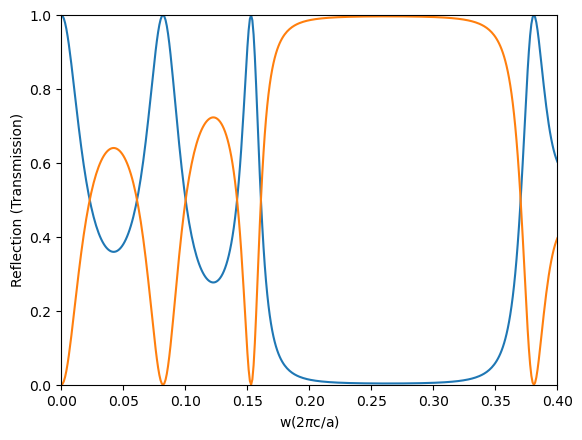

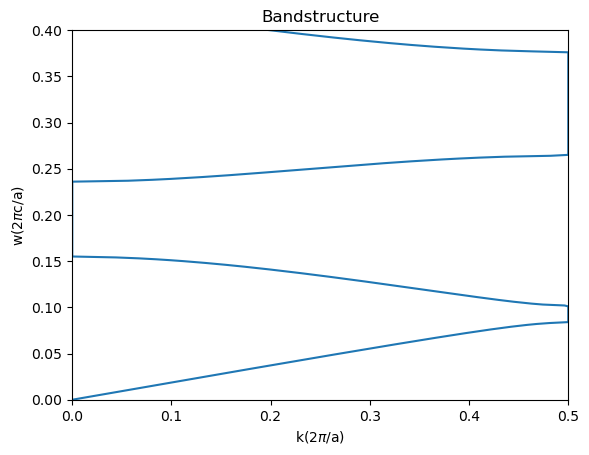

In [11]:
import matplotlib.pyplot as plt

norm_w = w/(2*pi*c)

plt.plot(norm_w,abs(t)**2, norm_w, abs(r)**2)
plt.axis([0,0.4,0,1])
plt.ylabel('Reflection (Transmission)')
plt.xlabel('w(2$\pi$c/a)')
plt.show()

plt.plot(bandstructure.real/(2*pi), norm_w)
plt.axis([0,0.5,0,0.4])
plt.title('Bandstructure')
plt.xlabel('k(2$\pi$/a)')
plt.ylabel('w(2$\pi$c/a)')
plt.show()